In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from matplotlib import transforms
from PIL import Image

In [57]:
image_path = 'stop.png'

def imscatter(x, y, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = Image.open(image_path)
    except TypeError:
        # Likely already an array...
        pass
    
    
    x, y = np.atleast_1d(x, y)
    artists = []
    
    for x0, y0 in zip(x, y):
        image = image.rotate(x0*180/np.pi)
        im = OffsetImage(image, zoom=zoom)
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False, box_alignment=(0.5,0.5))
        artists.append(ax.add_artist(ab))
        
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [40]:
x = np.linspace(0, 2*np.pi, 11)
y = np.sin(x)

(-1.2, 1.2)

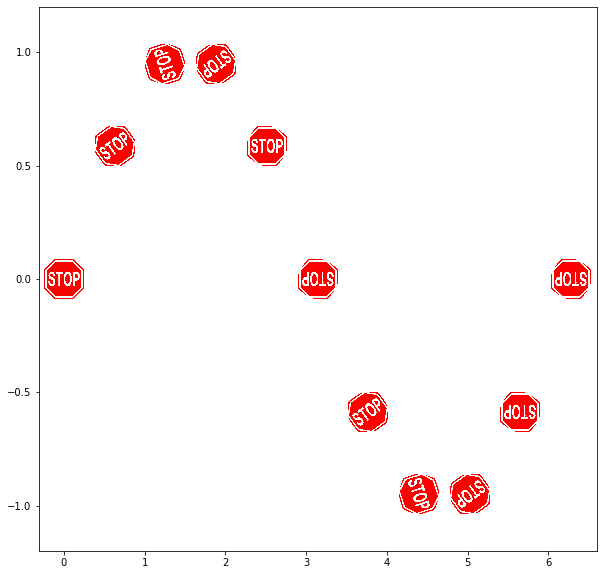

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
_ = imscatter(x, y, zoom=0.05, ax=ax)
ax.set_ylim(-1.2,1.2)